<a href="https://colab.research.google.com/github/GITGENome/renale/blob/main/Etude_maladie_renale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Maladie Rénale


Les maladies rénales affectent la fonction des reins, essentiels pour filtrer le sang, éliminer les déchets et réguler l'équilibre électrolytique. Elles peuvent être causées par divers facteurs tels que des infections, des lésions, des troubles auto-immuns ou des maladies héréditaires. Les symptômes incluent fatigue, gonflement, urine trouble, douleurs abdominales, hypertension. Le diagnostic nécessite des tests et des examens d'imagerie, parfois une biopsie rénale. Le traitement varie selon la cause et la gravité, impliquant médicaments, modifications du mode de vie, dialyse ou transplantation. La prévention passe par des habitudes de vie saines, le contrôle des conditions médicales sous-jacentes et des bilans de santé réguliers.

### Table des variables
___

* Age : âge / Age
* Al : albumine / Albumin
* Ane : anémie / Anemia
* Appet : appétit / Appetite
* Ba : bactérie / Bacteria
* Bgr : glycémie aléatoire / Blood Glucose Random
* BP : pression sanguine / Blood Pressure
* Bu : urée sanguine / Blood Urea
* Cad : maladie coronarienne / Coronary Artery Disease
* Class : classe / Class
* DM : diabète sucré / Diabetes Mellitus
* Hemo : hémoglobine / Hemoglobin
* Htn : hypertension / Hypertension
* PC : cellule de pus / Pus Cell
* Pcc : amas de cellules de pus / Pus Cell Clumps
* Pcv : volume d'hématocrites / Packed Cell Volume
* Pe : œdème de la pédale / Pedal Edema
* Pot : potassium / Potassium
* Rbc : globules rouges / Red Blood Cells
* Rc : nombre de globules rouges / Red Blood Cell Count
* Sc : créatinine sérique / Serum Creatinine
* SG : densité urinaire / Specific Gravity
* Sod : sodium / Sodium
* Su : sucre / Sugar
* WC : nombre de globules blancs / White Blood Cell Count






# Première exploration du dataset

In [1]:
# Importation modules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
#warnings.filterwarnings('ignore')

In [2]:
# Importation du dataset
nan = ["NaN", "NAN","\t43", "\t", "\t?"]
df_rein = pd.read_csv("https://raw.githubusercontent.com/MaskiVal/DataSets/main/kidney_disease.csv", na_values=nan)
pd.set_option("display.max_row", 111)

In [3]:
# 5 premiere lignes
display(df_rein.head())

# Information
display(df_rein.dtypes)

# Description
display(df_rein.describe())

# Column
print(df_rein.columns)

id   age    bp     sg   al   su     rbc        pc         pcc          ba  \
0  0.0  48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent  notpresent   
1  1.0   7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent  notpresent   
2  2.0  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent  notpresent   
3  3.0  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present  notpresent   
4  4.0  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent  notpresent   

   ...   pcv      wc   rc  htn   dm  cad  appet   pe  ane classification  
0  ...  44.0  7800.0  5.2  yes  yes   no   good   no   no            ckd  
1  ...  38.0  6000.0  NaN   no   no   no   good   no   no            ckd  
2  ...  31.0  7500.0  NaN   no  yes   no   poor   no  yes            ckd  
3  ...  32.0  6700.0  3.9  yes   no   no   poor  yes  yes            ckd  
4  ...  35.0  7300.0  4.6   no   no   no   good   no   no            ckd  

[5 rows x 26 columns]

id                float64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv               float64
wc                float64
rc                float64
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

id         age          bp          sg          al          su  \
count  399.000000  385.000000  388.000000  353.000000  354.000000  351.000000   
mean   199.892231   51.615584   76.469072    1.017408    1.016949    0.450142   
std    115.492678   17.270301   13.683637    0.005717    1.352679    1.099191   
min      0.000000    2.000000   50.000000    1.005000    0.000000    0.000000   
25%    100.500000   42.000000   70.000000    1.010000    0.000000    0.000000   
50%    200.000000   55.000000   80.000000    1.020000    0.000000    0.000000   
75%    299.500000   65.000000   80.000000    1.020000    2.000000    0.000000   
max    399.000000   90.000000  180.000000    1.025000    5.000000    5.000000   

              bgr          bu          sc         sod         pot        hemo  \
count  356.000000  381.000000  383.000000  313.000000  312.000000  348.000000   
mean   148.036517   57.425722    3.072454  137.528754    4.627244   12.526437   
std     79.281714   50.503006    5.741126   10.408752    3.193904    2.912587   
min     22.000000    1.500000    0.400000    4.500000    2.500000    3.100000   
25%     99.000000   27.000000    0.900000  135.000000    3.800000   10.300000   
50%    121.000000   42.000000    1.300000  138.000000    4.400000   12.650000   
75%    163.000000   66.000000    2.800000  142.000000    4.900000   15.000000   
max    490.000000  391.000000   76.000000  163.000000   47.000000   17.800000   

              pcv            wc          rc  
count  314.000000    294.000000  269.000000  
mean    38.687898   8406.122449    4.707435  
std      9.156679   2944.474190    1.025323  
min      9.000000   2200.000000    2.100000  
25%     32.000000   6500.000000    3.900000  
50%     40.000000   8000.000000    4.800000  
75%     46.000000   9800.000000    5.400000  
max     54.000000  26400.000000    8.000000

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')


# Data Cleaning

In [4]:
# Information des colonnes de type object
for col in df_rein.select_dtypes(object):
  print(f"{col} : {[i for i in df_rein[col].unique()]}\n")

rbc : [nan, 'normal', 'abnormal']

pc : ['normal', 'abnormal', nan]

pcc : ['notpresent', 'present', nan]

ba : ['notpresent', 'present', nan]

htn : ['yes', 'no', nan]

dm : ['yes', 'no', ' yes', '\tno', '\tyes', nan]

cad : ['no', 'yes', '\tno', nan]

appet : ['good', 'poor', nan]

pe : ['no', 'yes', nan]

ane : ['no', 'yes', nan]

classification : ['ckd', 'ckd\t', 'notckd']



Nous observons, qu'il y a des données avec des erreurs de frappe.

In [5]:
# Nettoyage et encodage
df_rein['dm'].replace({'\tno':'no', '\tyes':'yes', ' yes':'yes'},inplace=True)
df_rein['cad'].replace({'\tno':'no'}, inplace = True)
df_rein['classification'].replace({'ckd' : 'yes', 'ckd\t' : 'yes', 'notckd' : 'no' }, inplace = True)

# Changement nom de colonne
df_rein.rename(columns={'classification':'ill'}, inplace = True)

In [6]:
df_rein.isna().mean()*100

id        0.25
age       3.75
bp        3.00
sg       11.75
al       11.50
su       12.25
rbc      38.00
pc       16.25
pcc       1.00
ba        1.00
bgr      11.00
bu        4.75
sc        4.25
sod      21.75
pot      22.00
hemo     13.00
pcv      21.50
wc       26.50
rc       32.75
htn       0.50
dm        0.50
cad       0.50
appet     0.25
pe        0.25
ane       0.25
ill       0.00
dtype: float64

<Axes: >

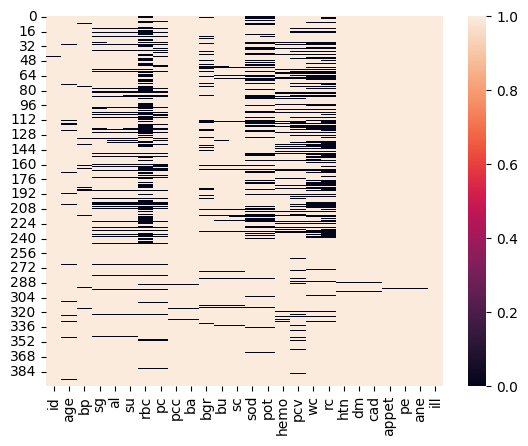

In [7]:
# Utilisation d'une heatmap pour visualiser les valeurs manquantes
sns.heatmap(df_rein.notna())

<Axes: >

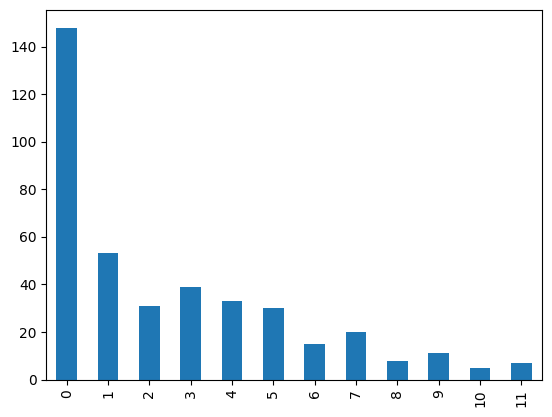

In [8]:
df_rein.isna().sum(axis=1).value_counts().sort_index().plot.bar()

J'enleve toutes les lignes avec un minimum de 6 valeurs manquantes sur la même ligne.

In [9]:
df_rein = df_rein[df_rein.isna().sum(axis=1)<=5]

In [10]:
# Je remplace toutes les valeurs de types category par la valeur la plus présente
for col in df_rein.select_dtypes(object).columns:
  df_rein[col] = df_rein[col].fillna(df_rein[col].mode()[0])

In [11]:
# Remplacement des valeurs manquantes numériques par la moyenne
col_num = df_rein.select_dtypes([int,float]).columns.to_list()
df_rein[col_num] = df_rein[col_num].fillna(df_rein[col_num].mean())

In [18]:
# colonne category
col_cat = df_rein.select_dtypes(object).columns.to_list()

# Data visualisation

14
















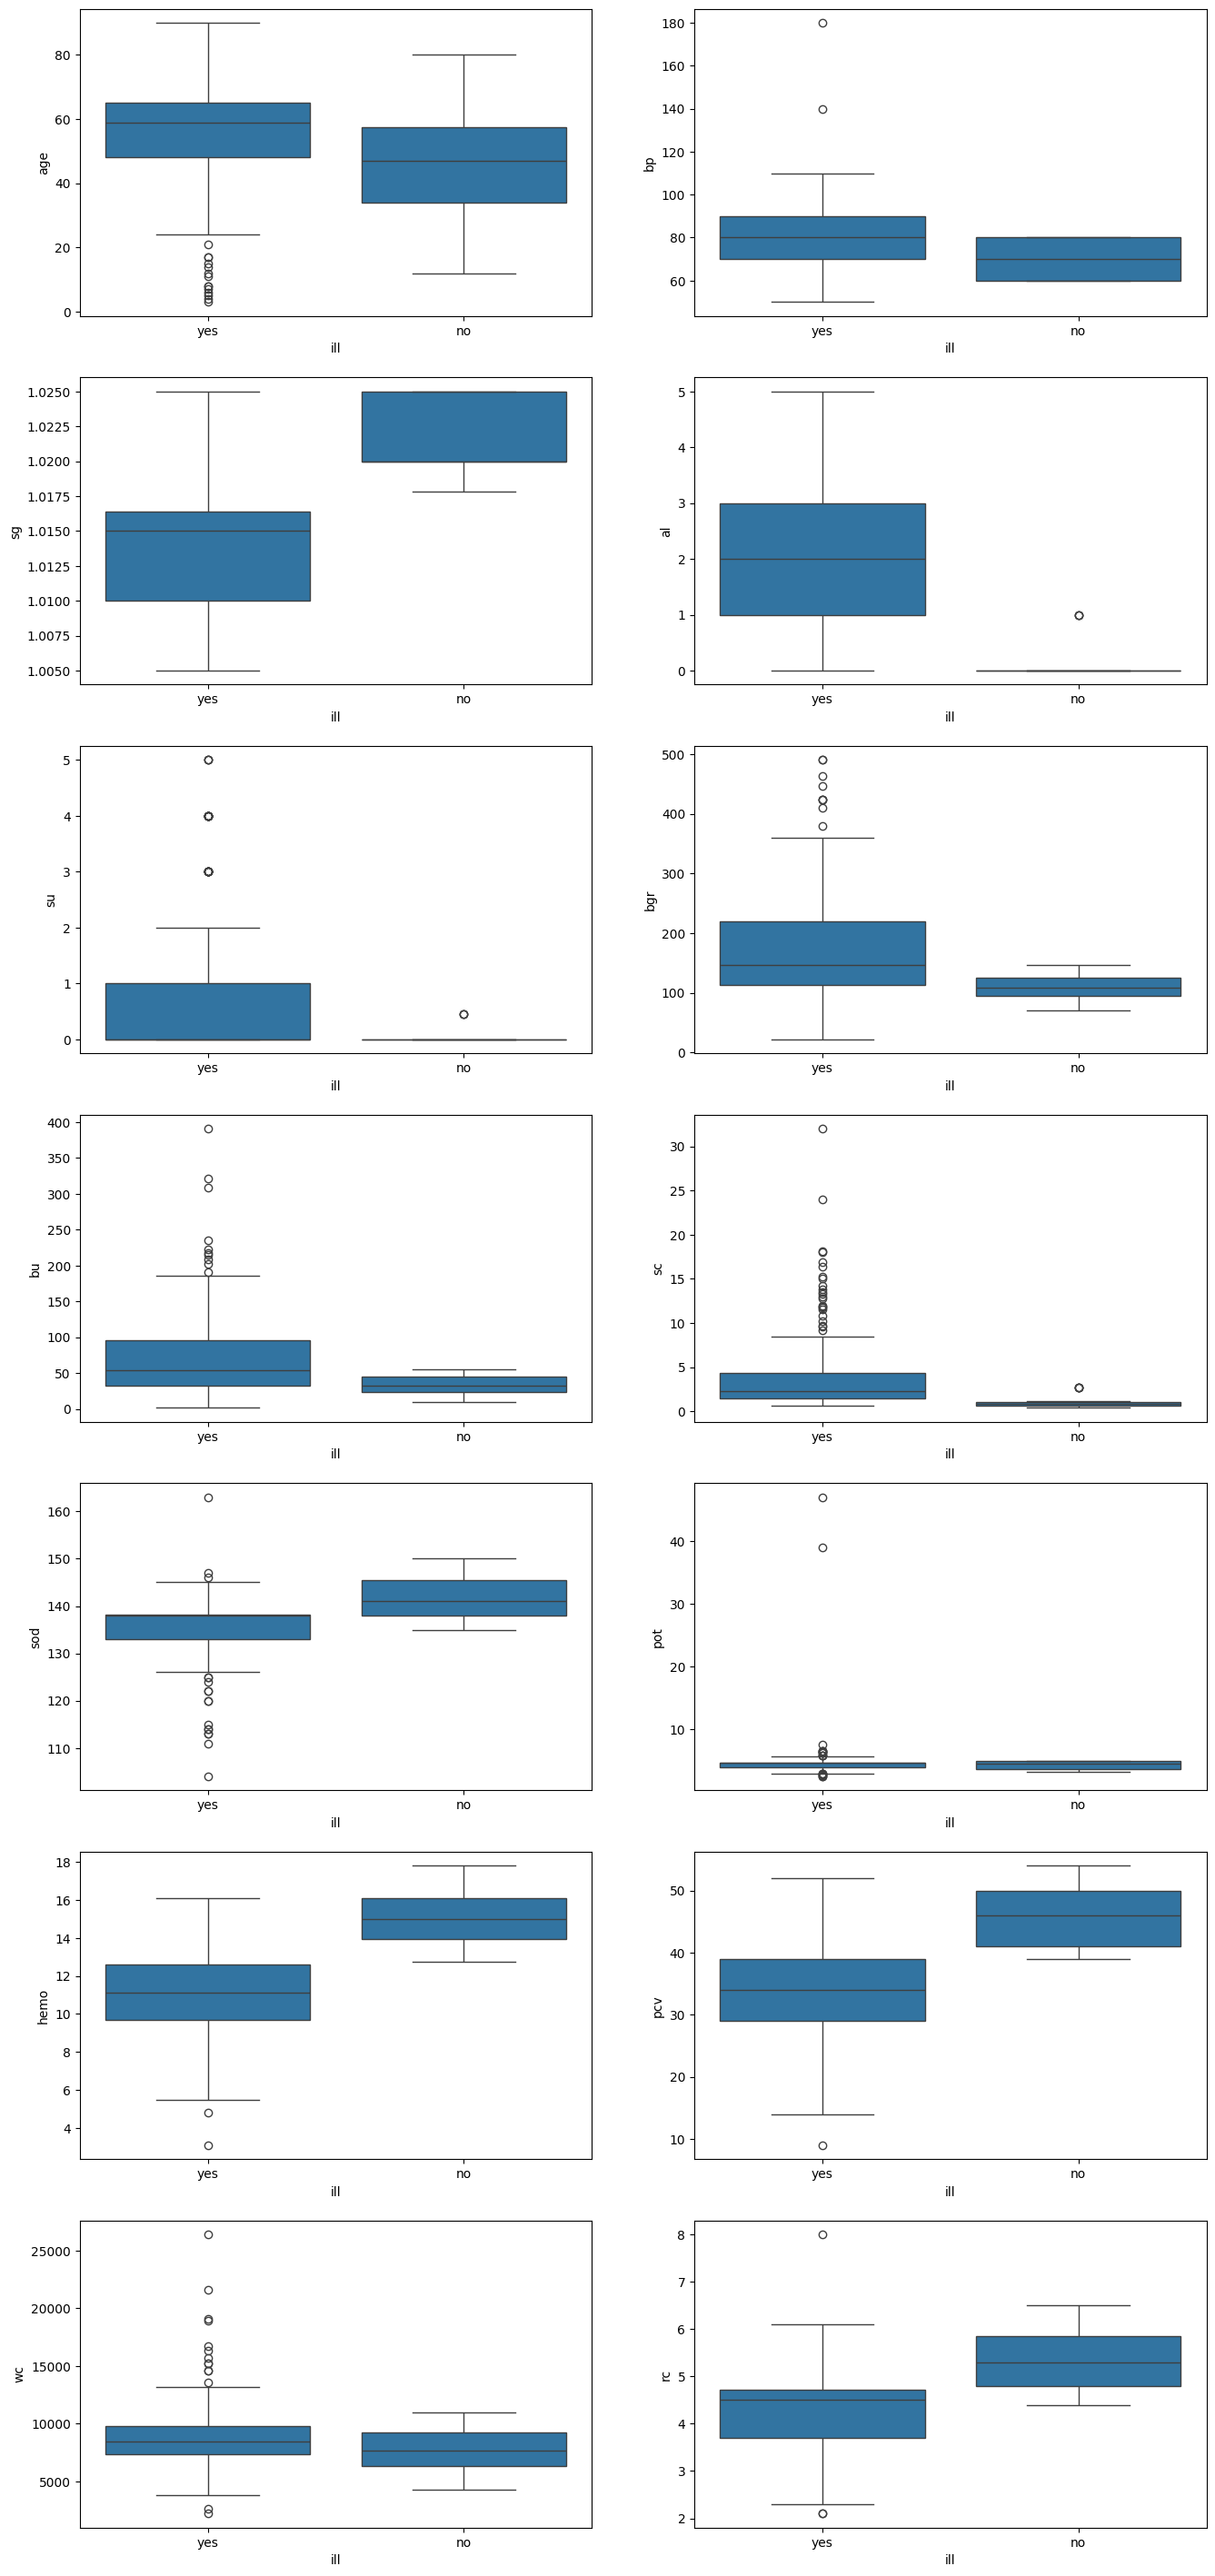

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

In [12]:
nbre_ligne = 7
nbre_cols = 2

fig, axes = plt.subplots(nbre_ligne, nbre_cols, figsize=(16, 36))
list_cols = df_rein.drop(columns = 'id').select_dtypes([int,float]).columns

print(len(list_cols))

id = 0
for row in range(nbre_ligne):
  for col in range(nbre_cols):
    if id < len(list_cols):
      plt.figure(figsize = (12,8))
      sns.boxplot(y = df_rein[list_cols[id]], x = df_rein['ill'], ax=axes[row,col])#.set(title=list_cols[id])
      id += 1
  print("\n")

# for col in df_rein.drop(columns = 'id').select_dtypes([int,float]).columns:
#   plt.figure()
#   sns.boxplot(x = df_rein[col])
#   #plt.title(col)
#   plt.show()
#   print("\n")

Les boxplots nous indique que nous avons la plupart des outliers qui sont du côté, des patients atteint d'une maladie.

14


<ipython-input-13-4834a459f995>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = df_rein[list_cols[id]][df_rein['ill']=='yes'], ax=axes[row,col], label = 'positif', color='r')
<ipython-input-13-4834a459f995>:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = df_rein[list_cols[id]][df_rei

<ipython-input-13-4834a459f995>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = df_rein[list_cols[id]][df_rein['ill']=='yes'], ax=axes[row,col], label = 'positif', color='r')
<ipython-input-13-4834a459f995>:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = df_rein[list_cols[id]][df_rei

<ipython-input-13-4834a459f995>:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = df_rein[list_cols[id]][df_rein['ill']=='no'], ax=axes[row,col], label = 'negatif').set(title=list_cols[id])
<ipython-input-13-4834a459f995>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = df_rein[list_col

<ipython-input-13-4834a459f995>:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = df_rein[list_cols[id]][df_rein['ill']=='no'], ax=axes[row,col], label = 'negatif').set(title=list_cols[id])
<ipython-input-13-4834a459f995>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = df_rein[list_col

<ipython-input-13-4834a459f995>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = df_rein[list_cols[id]][df_rein['ill']=='yes'], ax=axes[row,col], label = 'positif', color='r')
<ipython-input-13-4834a459f995>:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = df_rein[list_cols[id]][df_rei

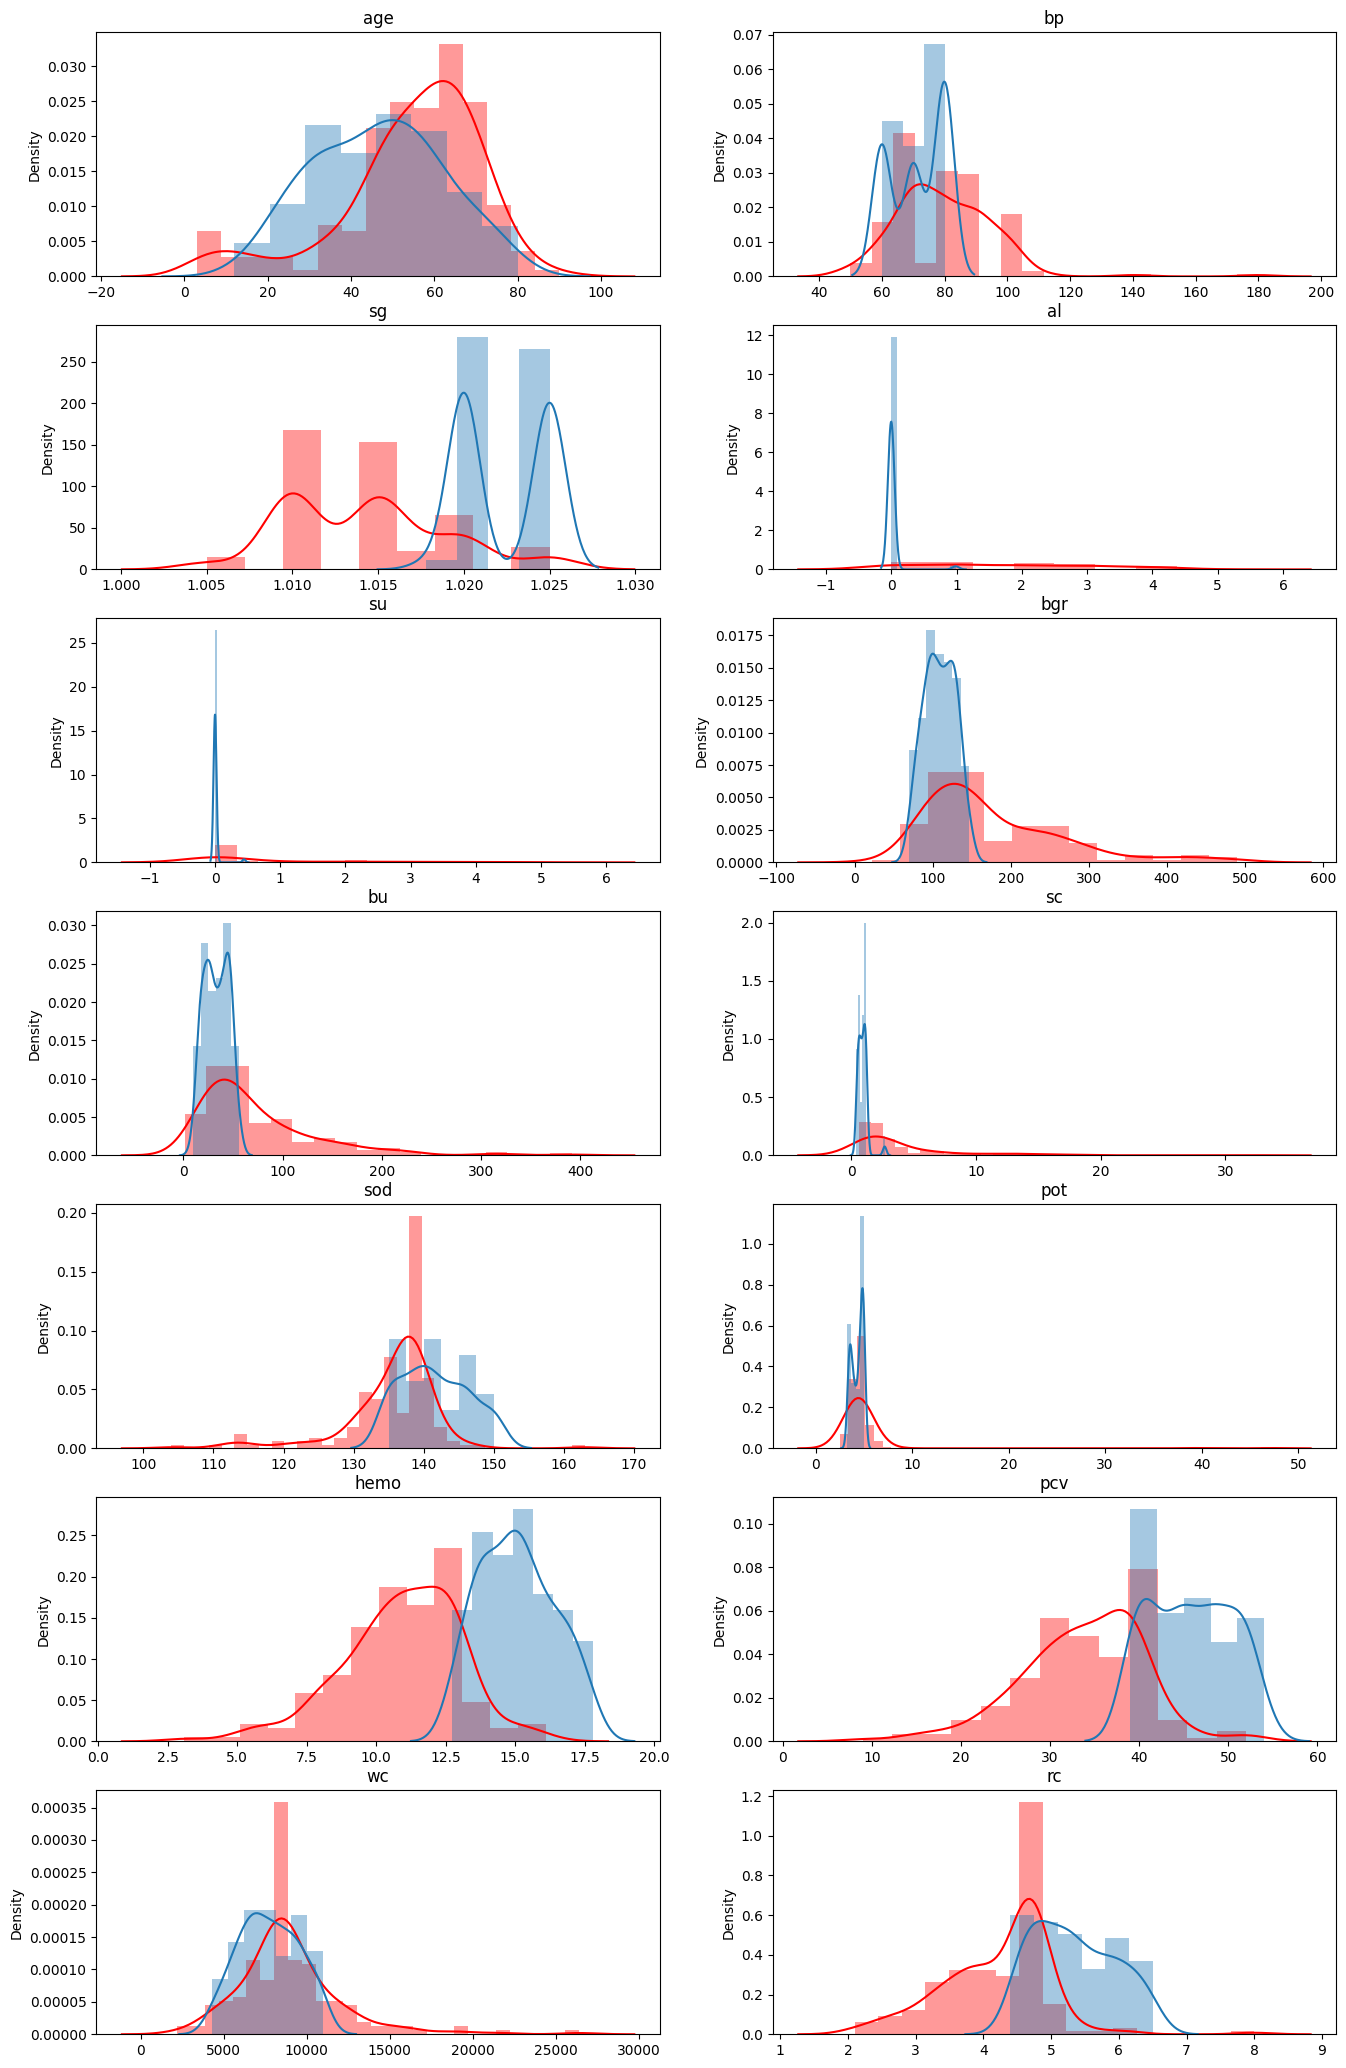

In [13]:
nbre_ligne = 7
nbre_cols = 2

fig, axes = plt.subplots(nbre_ligne, nbre_cols, figsize=(16, 26))
list_cols = df_rein.drop(columns = 'id').select_dtypes([int,float]).columns

print(len(list_cols))

id = 0
for row in range(nbre_ligne):
  for col in range(nbre_cols):
    if id < len(list_cols):
      #plt.figure(figsize = (12,8))
      sns.distplot(x = df_rein[list_cols[id]][df_rein['ill']=='yes'], ax=axes[row,col], label = 'positif', color='r')
      sns.distplot(x = df_rein[list_cols[id]][df_rein['ill']=='no'], ax=axes[row,col], label = 'negatif').set(title=list_cols[id])
      id += 1
  print("\n")

Les distplots nous apportent une certaine tendance à propos des individues atteint de la maladie :
- variable basse par rapport à la normale : albumine, taux de sucre, créatine sérique
- variable haute par apport à la normale : densité urinaire, l'hémoglobine, le volume d'hématocytes et le nombre de globules rouges.


In [14]:
liste = df_rein.select_dtypes(exclude=object).columns.to_list()
liste.append('ill')


In [15]:
#len(col_pairplot)

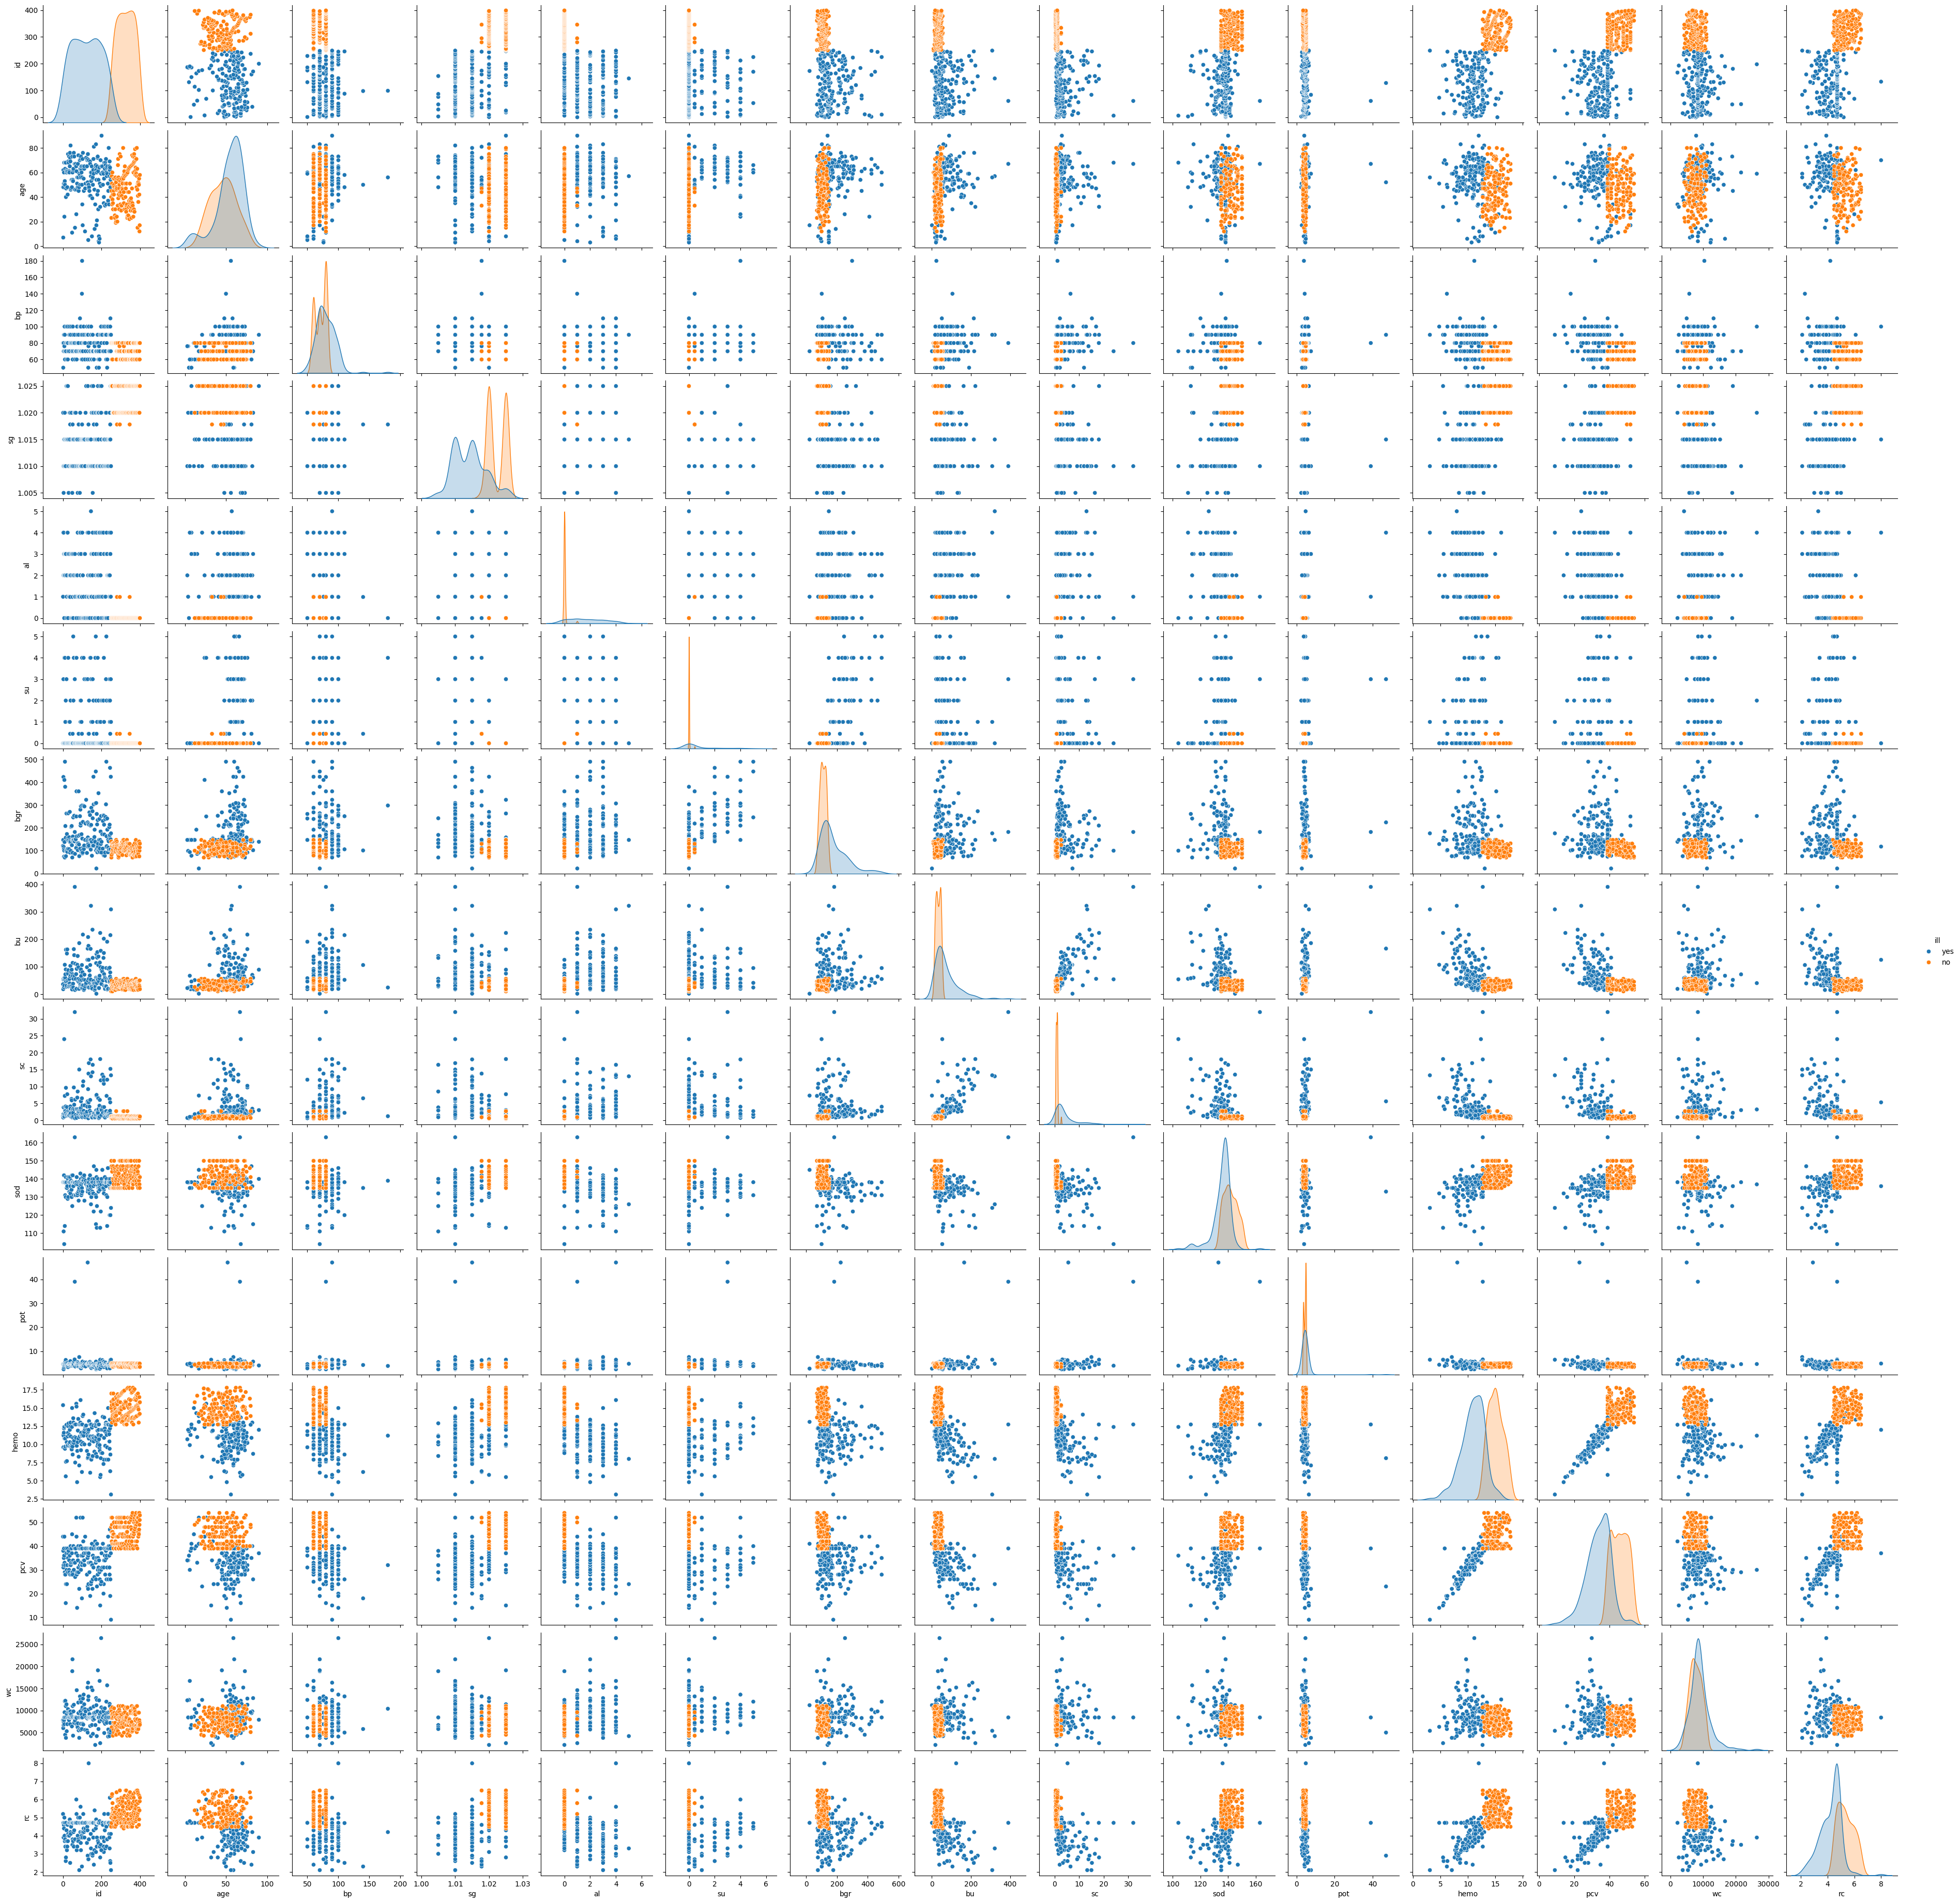

In [16]:
col_pairplot = df_rein.select_dtypes([int,float]).columns.to_list()
col_pairplot.append('ill')
sns.pairplot(data = df_rein[col_pairplot], hue='ill')

<ipython-input-17-82eb3a1d459a>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_rein.corr(), cmap = 'coolwarm', annot = True, vmin = -1)


<Axes: >

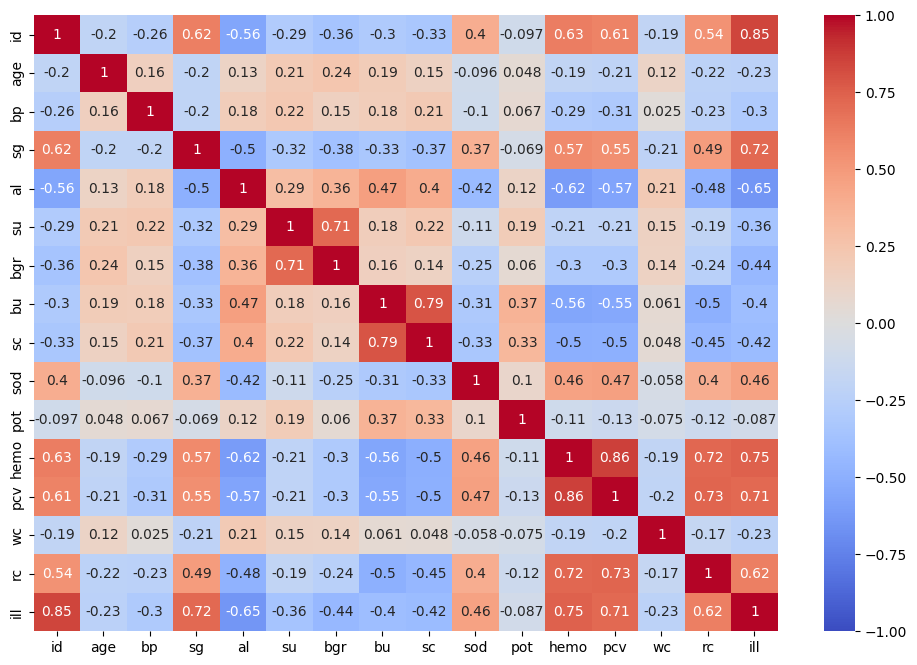

In [17]:
plt.figure(figsize=(12,8))
df_rein['ill'] = df_rein['ill'].factorize()[0]
sns.heatmap(df_rein.corr(), cmap = 'coolwarm', annot = True, vmin = -1)

Dans cette heatmap, nous avons quelques corrélation interessantes : le rc avec lepcv et l'hemo

# Plotly

In [19]:
import plotly.express as px
fig = px.scatter_3d(x = df_rein['hemo'],
                                y = df_rein['sod'],
                                z = df_rein['sg'],
                                color = df_rein['ill']
                    ) #Complete this code
fig.show()

# Test statistique

In [20]:
# Test ANOVA
import statsmodels.api as sm
import statsmodels.formula.api as smf

results = []

for col in col_num:
    result = smf.ols(f'{col} ~ ill', data=df_rein).fit()
    table = sm.stats.anova_lm(result)
    F = table.iloc[0, 3]  # The F-statistic
    p_value = table.iloc[0, 4]  # The p-value
    results.append((col, F, p_value))

df_anova = pd.DataFrame(results, columns=['col', 'F', 'p_value'])
df_anova


col           F       p_value
0     id  868.319616  1.138919e-94
1    age   19.170284  1.604336e-05
2     bp   33.483421  1.663001e-08
3     sg  353.280642  3.455108e-54
4     al  238.388351  6.505620e-41
5     su   48.265256  1.973701e-11
6    bgr   81.951721  1.210305e-17
7     bu   62.844002  3.433902e-14
8     sc   69.211340  2.320511e-15
9    sod   89.150904  6.694875e-19
10   pot    2.555905  1.108341e-01
11  hemo  426.188268  1.702372e-61
12   pcv  340.767670  7.426816e-53
13    wc   17.886259  3.036257e-05
14    rc  211.061937  2.334367e-37


À l'exception du taux de potassium, toutes les variables numériques semblent avoir une influence sur la probabilité qu'un patient soit atteint d'une maladie rénale chronique

In [21]:
#Test chi2 pour détecter quelles variables influent sur la probabilité que le patient soit atteint de la maladie
from scipy.stats import chi2_contingency

results = []

for col in col_cat:
    table = pd.crosstab(df_rein[col], df_rein['ill'])
    test = chi2_contingency(table)
    statistique = test[0]
    p_value = test[1]
    degre_liberte = test[2]
    results.append((col, statistique, p_value, degre_liberte))

df_chi2 = pd.DataFrame(results, columns=['col', 'statistique', 'p_value', 'degre_liberte'])
df_chi2

col  statistique       p_value  degre_liberte
0    rbc    35.749556  2.243831e-09              1
1     pc    66.131054  4.219159e-16              1
2    pcc    32.718042  1.065437e-08              1
3     ba    13.999509  1.828583e-04              1
4    htn   138.826772  4.805947e-32              1
5     dm   114.502239  1.011520e-26              1
6    cad    22.114765  2.568267e-06              1
7  appet    63.669526  1.471433e-15              1
8     pe    53.034576  3.277284e-13              1
9    ane    38.844293  4.589938e-10              1

Avec toutes les p_value < 0.05 toute les variables ne sont independantes.

In [22]:
df_rein.dtypes

id       float64
age      float64
bp       float64
sg       float64
al       float64
su       float64
rbc       object
pc        object
pcc       object
ba        object
bgr      float64
bu       float64
sc       float64
sod      float64
pot      float64
hemo     float64
pcv      float64
wc       float64
rc       float64
htn       object
dm        object
cad       object
appet     object
pe        object
ane       object
ill        int64
dtype: object

#Machine learning

In [33]:
df_rein

id   age    bp     sg   al   su     rbc        pc         pcc  \
0      0.0  48.0  80.0  1.020  1.0  0.0  normal    normal  notpresent   
1      1.0   7.0  50.0  1.020  4.0  0.0  normal    normal  notpresent   
2      2.0  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent   
3      3.0  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present   
4      4.0  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent   
..     ...   ...   ...    ...  ...  ...     ...       ...         ...   
395  395.0  55.0  80.0  1.020  0.0  0.0  normal    normal  notpresent   
396  396.0  42.0  70.0  1.025  0.0  0.0  normal    normal  notpresent   
397  397.0  12.0  80.0  1.020  0.0  0.0  normal    normal  notpresent   
398  398.0  17.0  60.0  1.025  0.0  0.0  normal    normal  notpresent   
399  399.0  58.0  80.0  1.025  0.0  0.0  normal    normal  notpresent   

             ba  ...   pcv      wc        rc  htn   dm  cad  appet   pe  ane  \
0    notpresent  ...  44.0  7800.0  5.200000  yes  yes   no   good   no   no   
1    notpresent  ...  38.0  6000.0  4.711832   no   no   no   good   no   no   
2    notpresent  ...  31.0  7500.0  4.711832   no  yes   no   poor   no  yes   
3    notpresent  ...  32.0  6700.0  3.900000  yes   no   no   poor  yes  yes   
4    notpresent  ...  35.0  7300.0  4.600000   no   no   no   good   no   no   
..          ...  ...   ...     ...       ...  ...  ...  ...    ...  ...  ...   
395  notpresent  ...  47.0  6700.0  4.900000   no   no   no   good   no   no   
396  notpresent  ...  54.0  7800.0  6.200000   no   no   no   good   no   no   
397  notpresent  ...  49.0  6600.0  5.400000   no   no   no   good   no   no   
398  notpresent  ...  51.0  7200.0  5.900000   no   no   no   good   no   no   
399  notpresent  ...  53.0  6800.0  6.100000   no   no   no   good   no   no   

     ill  
0    yes  
1    yes  
2    yes  
3    yes  
4    yes  
..   ...  
395   no  
396   no  
397   no  
398   no  
399   no  

[334 rows x 26 columns]

In [23]:
!pip install lazypredict

In [24]:
from lazypredict.Supervised import LazyClassifier


In [25]:
X = df_rein.drop(columns=['ill','id','hemo']).select_dtypes(exclude = object)
y= df_rein['ill']
print(X.columns)

Index(['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'pcv',
       'wc', 'rc'],
      dtype='object')


In [26]:
X.dtypes

age    float64
bp     float64
sg     float64
al     float64
su     float64
bgr    float64
bu     float64
sc     float64
sod    float64
pot    float64
pcv    float64
wc     float64
rc     float64
dtype: object

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.25,random_state =123)

In [28]:

clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
models

100%|██████████| 29/29 [00:04<00:00,  6.27it/s]

[LightGBM] [Info] Number of positive: 110, number of negative: 140
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000928 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 411
[LightGBM] [Info] Number of data points in the train set: 250, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.440000 -> initscore=-0.241162
[LightGBM] [Info] Start training from score -0.241162
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LogisticRegression                 0.99               0.99     0.99      0.99   
BernoulliNB                        0.99               0.99     0.99      0.99   
SVC                                0.99               0.99     0.99      0.99   
SGDClassifier                      0.99               0.99     0.99      0.99   
Perceptron                         0.99               0.99     0.99      0.99   
ExtraTreesClassifier               0.99               0.99     0.99      0.99   
NuSVC                              0.99               0.99     0.99      0.99   
LinearSVC                          0.98               0.98     0.98      0.98   
CalibratedClassifierCV             0.98               0.98     0.98      0.98   
PassiveAggressiveClassifier        0.98               0.98     0.98      0.98   
KNeighborsClassifier               0.98               0.98     0.98      0.98   
AdaBoostClassifier                 0.98               0.98     0.98      0.98   
BaggingClassifier                  0.98               0.97     0.97      0.98   
DecisionTreeClassifier             0.98               0.97     0.97      0.98   
LGBMClassifier                     0.98               0.97     0.97      0.98   
LinearDiscriminantAnalysis         0.96               0.97     0.97      0.96   
RidgeClassifier                    0.96               0.97     0.97      0.96   
RidgeClassifierCV                  0.96               0.97     0.97      0.96   
ExtraTreeClassifier                0.96               0.96     0.96      0.96   
RandomForestClassifier             0.96               0.96     0.96      0.96   
XGBClassifier                      0.96               0.96     0.96      0.96   
QuadraticDiscriminantAnalysis      0.95               0.96     0.96      0.95   
LabelSpreading                     0.95               0.95     0.95      0.95   
LabelPropagation                   0.95               0.95     0.95      0.95   
GaussianNB                         0.95               0.95     0.95      0.95   
NearestCentroid                    0.94               0.95     0.95      0.94   
DummyClassifier                    0.56               0.50     0.50      0.40   

                               Time Taken  
Model                                      
LogisticRegression                   0.05  
BernoulliNB                          0.03  
SVC                                  0.05  
SGDClassifier                        0.09  
Perceptron                           0.07  
ExtraTreesClassifier                 0.65  
NuSVC                                0.06  
LinearSVC                            0.06  
CalibratedClassifierCV               0.16  
PassiveAggressiveClassifier          0.05  
KNeighborsClassifier                 0.07  
AdaBoostClassifier                   0.39  
BaggingClassifier                    0.16  
DecisionTreeClassifier               0.06  
LGBMClassifier                       0.22  
LinearDiscriminantAnalysis           0.08  
RidgeClassifier                      0.06  
RidgeClassifierCV                    0.10  
ExtraTreeClassifier                  0.04  
RandomForestClassifier               1.27  
XGBClassifier                        0.44  
QuadraticDiscriminantAnalysis        0.10  
LabelSpreading                       0.07  
LabelPropagation                     0.06  
GaussianNB                           0.03  
NearestCentroid                      0.05  
DummyClassifier                      0.05

In [37]:
print(X.columns)
print(y)

Index(['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'pcv',
       'wc', 'rc'],
      dtype='object')
0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    1
399    1
Name: ill, Length: 334, dtype: int64


In [ ]:
import numpy as np
dictionaire = {'SVC' : {'kernel' : ['linear', 'rbf', 'poly'],
                      'gamma' : [0.1, 1, 10, 100],
                      'C' : [0.1, 1, 10, 100, 1000],
                      'degree' : [0, 1, 2, 3, 4, 5, 6, 'scale'],
                      'shrinking' : [True, False],
                        'random_state' : [42]},
               'LogisticRegression' : {'solver' : ['newton-cg', 'lbfgs', 'liblinear'],
                                       'C' : [0.1, 1, 10, 100, 1000],
                                       'random_state' : [42]},
               'LinearSVC' : {'loss' : ['hinge', 'squared_hinge'],
                              'C' : [0.1, 1, 10, 100, 1000],
                              'intercept_scaling' : [1, 10, 100, 1000],
                              'penalty' : ['l1', 'l2'],
                              'multi_class' : ['ovr', 'crammer_singer'],
                              'max_iter' : [100, 500, 1000],
                              'random_state' : [42]},
                'Perceptron' : {'eta0' : [0.0001, 0.001, 0.01, 0.1, 1.0],
                                'max_iter' : [1, 10, 100, 1000],
                                'random_state' : [42],
                                'alpha' : [0.0001, 0.001, 0.01, 0.1],
                                'penalty' : ['l2','l1','elasticnet'],
                                'tol' : [None, 0.001, 0.002, 0.01, 0.1],
                                'class_weight' : [None, 'balanced'],
                                'random_state' : [42]
                                },
               'SGDClassifier' : {"loss":["hinge", "log_loss", "modified_huber", "squared_hinge", "perceptron", "squared_error", "huber", "epsilon_insensitive", "squared_epsilon_insensitive"],
                                  "penalty":["l2", "l1", "elasticnet"],
                                  "learning_rate": ['optimal','adaptive',"invscaling"],
                                  "eta0" :  [0.01, 0.1, 0.5, 1],
                                  "validation_fraction": [0,0.1,0.5,0.7,1],
                                  "class_weight": [None,"balanced"],
                                  "warm_start": [False, True],
                                  #"average": [False]+[i for i in np.arange(0,1.1,0.1)],
                                  'random_state' : [42]},
               "GaussianNB" : {'var_smoothing': [1e-11, 1e-10, 1e-9]}}



import numpy as np

from sklearn.metrics import confusion_matrix

from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, QuantileTransformer, PowerTransformer, Normalizer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, KBinsDiscretizer, Binarizer

from sklearn.compose import make_column_selector as selector
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier

liste_scaler = [StandardScaler(),
                  MinMaxScaler(),
                  MaxAbsScaler(),
                  QuantileTransformer(),
                  PowerTransformer(),
                  Normalizer()]
liste_encoder = [OneHotEncoder(),
                  OrdinalEncoder(),
                  KBinsDiscretizer(),
                  Binarizer()]

nbre_combinaison = len(liste_scaler)*len(liste_encoder)

# Combinaisons des listes

scaler_encoder = [(scaler, encoder) for scaler in liste_scaler for encoder in liste_encoder]


def find_best_param(X, y, model, scaler_encoder):
  i = 1

  for scaler, encoder in scaler_encoder:
      selector_num_cols = selector(dtype_exclude=object)
      selector_cat_cols = selector(dtype_include=object)

      num_cols = selector_num_cols(X)
      cat_cols = selector_cat_cols(X)


      num_preprocessor = scaler
      cat_preprocessor = encoder

      preprocessor = ColumnTransformer(
                  [
                      (str(cat_preprocessor)[:-2], cat_preprocessor, cat_cols),
                      (str(num_preprocessor)[:-2], num_preprocessor, num_cols),
                  ]
              )
      random = RandomizedSearchCV(model,
                                              dictionaire[str(model)[:-2]],
                                              n_iter= 10,
                                              cv = 5)

      Model = make_pipeline(
                                  preprocessor,
                                  random
                              )


      X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size=0.8)
      Model.fit(X_train, y_train)

      print('Scaler', scaler)
      print('Encoder', encoder)
      print(f'For {model} the best parametres are \n {random.best_params_}')
      print(f' Accuracy train : {Model.score(X_train, y_train)}')
      print(f' Accuracy test : {Model.score(X_test, y_test)}')
      print('Model',f"{list(dictionaire.keys()).index(str(model)[:-2])}/{len(dictionaire)}")
      print('Pipelines testés :',f"{i}/{len(scaler_encoder)}\n")
      if i == scaler_encoder:
        i=1
      else:
        i+=1

      display(pd.DataFrame(confusion_matrix(y_true = y_test, y_pred = Model.predict(X_test)),
          columns = np.array([str(i) for i in Model.classes_]).astype(object) + ' predicted',
          index = np.array([str(i) for i in Model.classes_]).astype(object) + ' actual'
          ))



for model in list(dictionaire.keys()):
  exec(f"find_best_param(X, y,{model}(),scaler_encoder)")

Le modèle ayant le meilleur score est celui du SVC avec les paramètre suivant :
* shrinking : False
* random_state : 42
* kernel : linear
* gamma : 0.1
* degree : 1
* C : 10

Avec

* Scaler : StandardScaler()
* Encoder : KBinsDiscretizer()

Pour un score :
* train : 0.9887
* test : 0.98507

Nous avons un très bon score car la maladie est très bien distribué.


In [36]:
from sklearn.svm import SVC
SVC(shrinking=False, random_state=42, kernel='linear', gamma = 1, degree = 3, C = 1)

SVC(C=1, gamma=1, kernel='linear', random_state=42, shrinking=False)

# Application du modele

In [38]:
from sklearn.compose import make_column_selector as selector
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MaxAbsScaler, OrdinalEncoder, KBinsDiscretizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC


selector_num_cols = selector(dtype_exclude=object)
selector_cat_cols = selector(dtype_include=object)

num_cols = selector_num_cols(X)
cat_cols = selector_cat_cols(X)

num_preprocessor = StandardScaler()
cat_preprocessor = KBinsDiscretizer()


preprocessor = ColumnTransformer(
            [
                ("OneHotEncoder", cat_preprocessor, cat_cols),
                ("StandardScaler", num_preprocessor, num_cols),
            ]
        )

Model_SVC = make_pipeline(
                            preprocessor,
                            SVC(shrinking=False, random_state=42, kernel='linear', gamma=0.1,degree=1,C=10, probability=True)
                        )





In [39]:
Model_SVC.fit(X_train,y_train)
print(Model_SVC.score(X_train,y_train))
print(Model_SVC.score(X_test,y_test))
Model_SVC.predict_proba(X_test)[:5]

0.984
0.9761904761904762


array([[9.99649218e-01, 3.50782438e-04],
       [9.96070964e-01, 3.92903590e-03],
       [2.96933783e-02, 9.70306622e-01],
       [3.15740577e-03, 9.96842594e-01],
       [9.99999900e-01, 1.00000010e-07]])



> Scaler MaxAbsScaler()
Encoder OrdinalEncoder()
For Perceptron() the best parametres are
 {'tol': 0.001, 'random_state': 42, 'penalty': 'elasticnet', 'max_iter': 1000, 'eta0': 0.001, 'class_weight': 'balanced', 'alpha': 0.001}
 Accuracy train : 0.9550561797752809
 Accuracy test : 0.9850746268656716
Model 3/6
Pipelines testés : 10/24



# Exportation et importation du modele

In [44]:
from joblib import dump, load

dump(Model_SVC, 'renale_model_saved.joblib')

['renale_model_saved.joblib']

In [45]:
from joblib import dump, load
reg_loaded = load('renale_model_saved.joblib')

In [46]:
reg_loaded

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('OneHotEncoder',
                                                  KBinsDiscretizer(), []),
                                                 ('StandardScaler',
                                                  StandardScaler(),
                                                  ['age', 'bp', 'sg', 'al',
                                                   'su', 'bgr', 'bu', 'sc',
                                                   'sod', 'pot', 'pcv', 'wc',
                                                   'rc'])])),
                ('svc',
                 SVC(C=10, degree=1, gamma=0.1, kernel='linear',
                     probability=True, random_state=42, shrinking=False))])

In [47]:
X.head(21)

age     bp   sg   al   su    bgr     bu    sc    sod  pot   pcv       wc  \
0  48.00  80.00 1.02 1.00 0.00 121.00  36.00  1.20 138.19 4.64 44.00  7800.00   
1   7.00  50.00 1.02 4.00 0.00 147.07  18.00  0.80 138.19 4.64 38.00  6000.00   
2  62.00  80.00 1.01 2.00 3.00 423.00  53.00  1.80 138.19 4.64 31.00  7500.00   
3  48.00  70.00 1.00 4.00 0.00 117.00  56.00  3.80 111.00 2.50 32.00  6700.00   
4  51.00  80.00 1.01 2.00 0.00 106.00  26.00  1.40 138.19 4.64 35.00  7300.00   
5  60.00  90.00 1.01 3.00 0.00  74.00  25.00  1.10 142.00 3.20 39.00  7800.00   
6  68.00  70.00 1.01 0.00 0.00 100.00  54.00 24.00 104.00 4.00 36.00  8423.84   
7  24.00  76.12 1.01 2.00 4.00 410.00  31.00  1.10 138.19 4.64 44.00  6900.00   
8  52.00 100.00 1.01 3.00 0.00 138.00  60.00  1.90 138.19 4.64 33.00  9600.00   
9  53.00  90.00 1.02 2.00 0.00  70.00 107.00  7.20 114.00 3.70 29.00 12100.00   
10 50.00  60.00 1.01 2.00 4.00 490.00  55.00  4.00 138.19 4.64 28.00  8423.84   
11 63.00  70.00 1.01 3.00 0.00 380.00  60.00  2.70 131.00 4.20 32.00  4500.00   
12 68.00  70.00 1.01 3.00 1.00 208.00  72.00  2.10 138.00 5.80 28.00 12200.00   
14 68.00  80.00 1.01 3.00 2.00 157.00  90.00  4.10 130.00 6.40 16.00 11000.00   
15 40.00  80.00 1.01 3.00 0.00  76.00 162.00  9.60 141.00 4.90 24.00  3800.00   
16 47.00  70.00 1.01 2.00 0.00  99.00  46.00  2.20 138.00 4.10 39.03  8423.84   
18 60.00 100.00 1.02 0.00 3.00 263.00  27.00  1.30 135.00 4.30 37.00 11400.00   
19 62.00  60.00 1.01 1.00 0.00 100.00  31.00  1.60 138.19 4.64 30.00  5300.00   
20 61.00  80.00 1.01 2.00 0.00 173.00 148.00  3.90 135.00 5.20 24.00  9200.00   
22 48.00  80.00 1.02 4.00 0.00  95.00 163.00  7.70 136.00 3.80 32.00  6900.00   
24 42.00 100.00 1.01 4.00 0.00 147.07  50.00  1.40 129.00 4.00 39.00  8300.00   

     rc  
0  5.20  
1  4.71  
2  4.71  
3  3.90  
4  4.60  
5  4.40  
6  4.71  
7  5.00  
8  4.00  
9  3.70  
10 4.71  
11 3.80  
12 3.40  
14 2.60  
15 2.80  
16 4.71  
18 4.30  
19 3.70  
20 3.20  
22 3.40  
24 4.60

In [53]:
reg_loaded.predict_proba(X.head(1))[0][0]

0.6113571657986316

In [54]:
print(X.iloc[13])
reg_loaded.predict_proba(pd.DataFrame(X.iloc[24]).T)

age      68.00
bp       80.00
sg        1.01
al        3.00
su        2.00
bgr     157.00
bu       90.00
sc        4.10
sod     130.00
pot       6.40
pcv      16.00
wc    11000.00
rc        2.60
Name: 14, dtype: float64


array([[9.99582331e-01, 4.17669340e-04]])

___
# Simulation du modèle
___

In [55]:
import pandas as pd
dico = {"age":61.00,
 "bp":60,
 "sg":1.025,
 "al":0.00,
 "su":0.00,
 "bgr":108.00,
 "bu":75.00,
 "sc":1.09,
 "sod":181.19,
 "pot":5.2,
 "pcv":29.00,
 "wc":8400.00,
 "rc":3.7
 }

df_test = pd.DataFrame(dico.values(), dico.keys()).T
display(df_test)
reg_loaded.predict_proba(df_test)

age    bp   sg   al   su    bgr    bu   sc    sod  pot   pcv      wc   rc
0 61.00 60.00 1.02 0.00 0.00 108.00 75.00 1.09 181.19 5.20 29.00 8400.00 3.70

array([[0.42859843, 0.57140157]])

In [56]:
pd.concat([X,y], axis = 1).iloc[21]

age     61.00
bp      60.00
sg       1.02
al       0.00
su       0.00
bgr    108.00
bu      75.00
sc       1.90
sod    141.00
pot      5.20
pcv     29.00
wc    8400.00
rc       3.70
ill      0.00
Name: 25, dtype: float64

In [58]:
reg_loaded.predict_proba(pd.concat([X,y], axis = 1).head(1))[0][1]

0.38864283420136836

In [29]:
reg_loaded

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('OneHotEncoder',
                                                  KBinsDiscretizer(), []),
                                                 ('StandardScaler',
                                                  StandardScaler(),
                                                  ['age', 'bp', 'sg', 'al',
                                                   'su', 'bgr', 'bu', 'sc',
                                                   'sod', 'pot', 'pcv', 'wc',
                                                   'rc'])])),
                ('svc',
                 SVC(C=10, degree=1, gamma=0.1, probability=True,
                     random_state=42, shrinking=False))])

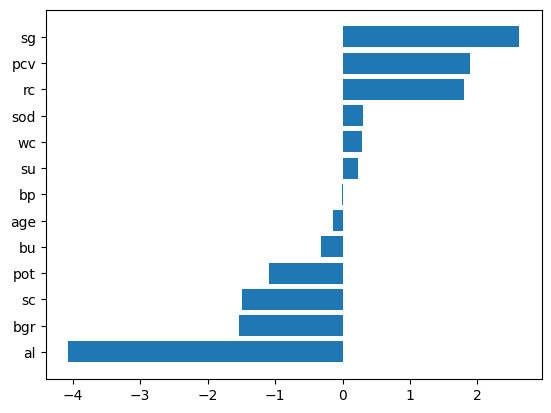

In [60]:
from matplotlib import pyplot as plt
from sklearn import svm

def f_importances(coef, names):
    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.show()

features_names = X.columns
# svm = svm.SVC(kernel='linear')
# svm.fit(X, Y)
f_importances(reg_loaded.named_steps['svc'].coef_[0], features_names)

In [62]:
name_feature = list()
coef_abs = list()
for name, coeff in zip(features_names, reg_loaded.named_steps['svc'].coef_[0]):
  name_feature.append(name)
  coef_abs.append(coeff)

In [63]:
dico_tra ={
    "al":"albumine",
    "pcv" : "volume d'hématocytes",
    "sg": "densité urinaire",
    "sc" : "créatine sérique",
    "rc" : "nombre de globules rouges",
    "bgr": "glycémie",
    "bu": "urée sanguine",
    "wc" : "nombre de globules blancs",
    "bp": "pression sanguine",
    "pot":"potassium",
    "sod":"sodium",
    "age" :"age",
    "su":"sucre"

}

# Visualisation de l'importance des variables

In [71]:
 feature_coeff_rein = pd.DataFrame({"feature":name_feature, "coeff":coef_abs}).sort_values("coeff").set_index('feature')
 feature_coeff_rein.to_csv("feature_coeff_rein.csv")

In [72]:
df_hop = feature_coeff_rein.apply(lambda x : abs(x)).sort_values(by='coeff', ascending = False)

In [73]:
df_hop=df_hop.reset_index()

In [74]:
df_hop["feature"]=df_hop["feature"].map(dico_tra)

In [75]:
df_hop.to_csv("feature_coeff_rein.csv")

In [76]:
feature_coeff_rein.apply(lambda x : abs(x)).sort_values(by='coeff', ascending = False)

coeff
feature       
al        4.07
sg        2.62
pcv       1.89
rc        1.81
bgr       1.53
sc        1.49
pot       1.09
bu        0.32
sod       0.30
wc        0.28
su        0.23
age       0.15
bp        0.01

In [77]:
feature_coeff_rein.apply(lambda x : abs(x)).sort_values(by='coeff', ascending = False).to_csv('feature_coeff_rein.csv')

In [78]:
import plotly.express as px
list_importance=feature_coeff_rein['coeff']
list_features = feature_coeff_rein.index
fig_importance = px.line_polar(theta=list_features, r=list_importance, line_close=True,
                    color_discrete_sequence=px.colors.sequential.Plasma,
                   )
fig_importance.show()